In [1]:
import pickle
import numpy as np

In [2]:
import os, sys
WORKING_DIR = os.path.dirname(os.path.abspath(''))
sys.path.insert(1, os.path.join(WORKING_DIR,'LensQuEst'))

#to get latex to work, shoulldn't be necessary for most ppl
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']

In [3]:
###
N_runs = 1000
# number of pixels for the flat map
nX = 400 # 1200
nY = 400 #1200
template_fname = 'Cls_%dx%d_point_sources_bigger.pkl'%(nX,nY)
psfile = 'point_sources_bigger.png'
mask_file = 'mask_simple400x400.png'
mean_field = 'mask_simple400x400_point_sources_bigger.pkl'
psapod = 1.5
run=True
###

In [4]:
f = open(template_fname, 'rb') 
Cls_tot = pickle.load(f)
f.close()

In [5]:
final_keys = ['(Auto QE)-(Power Spectrum(hat NL))', 
              '(Auto QE)-(Power Spectrum(hat NL)) [M]',
              '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]']

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
})

In [8]:
#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


from scipy.ndimage import gaussian_filter 
from scipy.fft import fft2

mask = 1-rgb2gray(plt.imread('mask_simple%dx%d.png'%(nX, nY)))
apodized_mask = gaussian_filter(mask, 5)


In [9]:
fsky = np.sum(apodized_mask)/(nX*nY)


for i in range(N_runs-1):
    for key in final_keys:
        assert(all(Cls_tot[key][i][0] == Cls_tot[key][i+1][0]))
lCen =  Cls_tot[final_keys[0]][0][0]
Cls = {}
sCls = {}
for key in final_keys:
    Cls[key] = np.sum(np.transpose(Cls_tot[key], axes=[1,2,0])[1], axis=1)/N_runs
    sCls[key] = np.sqrt(np.sum(np.square(np.transpose(Cls_tot[key], axes=[1,2,0])[2]), axis=1))/(np.sqrt(N_runs))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.729851875009801e-07, 2.590806809398567e-07), (0.0, 0.0), (1.6809893475443406e-07, 3.0471423523997464e-07), (0.0, 0.0), (1.4617331440430814e-07, 1.3268322639377116e-07), (0.0, 0.0), (1.1853682867749313e-07, 1.0218450338064325e-07), (9.9663859810809e-08, 1.0972076545973641e-07), (9.374844594842417e-08, 8.714110278811451e-08), (7.953670437524739e-08, 5.674873307177403e-08), (7.039180808596893e-08, 5.503801702736033e-08), (5.914585639988951e-08, 4.07754022331018e-08), (4.90965126805264e-08, 3.1109250078362596e-08), (3.864656058045437e-08, 2.4970563036963256e-08), (3.1168722955212286e-08, 2.037111693752754e-08), (2.459229889739907e-08, 1.5027643019630947e-08), (1.9612954537887753e-08, 1.2148722851758232e-08), (1.5171286371545575e-08, 9.52106899162667e-09), (1.204

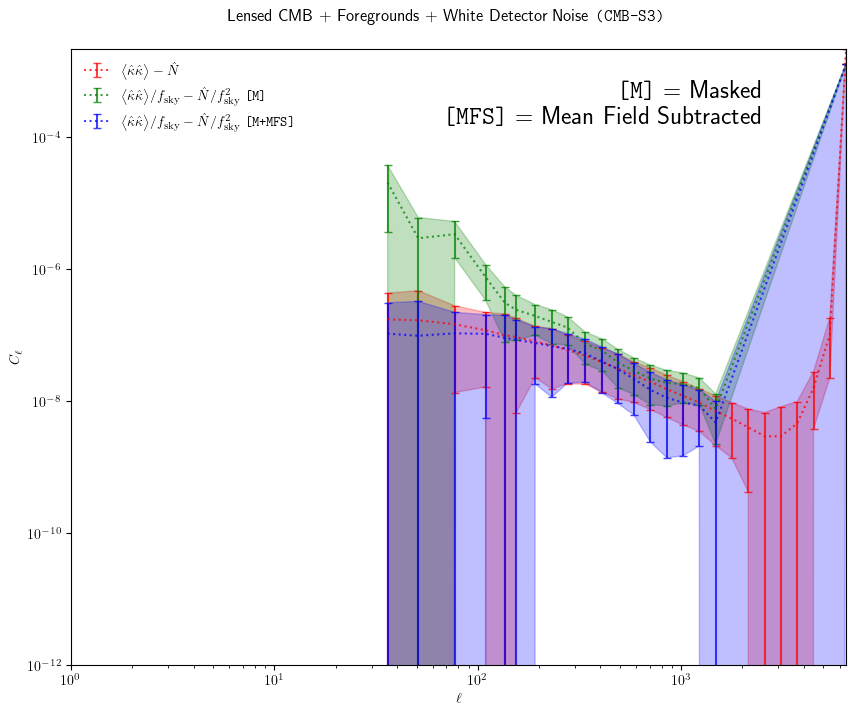

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, figsize=(10,8), sharey=True)
axs = [axs]
fig.subplots_adjust(wspace=0, hspace=0)

# ell = baseMap.l.flatten()
factor = 1. # lCen**2
labels ={'Standard QE': r'${\big<\hat \kappa \hat\kappa \big>}$',
        'AFC Eq(7)': r'Computed noise $\hat N$',
        '(Auto QE)-(Power Spectrum(hat NL))': r'${\big<\hat \kappa \hat\kappa \big>- \hat N}$',
        'Standard QE Masked MFS': r'${\big<\hat \kappa \hat\kappa \big>}/f_{\rm sky}$ \texttt{[M+MFS]}',
        'AFC Eq(7) Masked MFS': r'Computed noise $\hat N$ \texttt{[M+MFS]}',
        '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]': r'${\big<\hat \kappa \hat\kappa \big>/f_{\rm sky}- \hat N}/f_{\rm sky}^2$ \texttt{[M+MFS]}',
        'Standard QE Masked': r'${\big<\hat \kappa \hat\kappa \big>}/f_{\rm sky}$ \texttt{[M]}',
        'AFC Eq(7) Masked': r'Computed noise $\hat N$ \texttt{[M]}',
        '(Auto QE)-(Power Spectrum(hat NL)) [M]': r'${\big<\hat \kappa \hat\kappa \big>/f_{\rm sky}- \hat N}/f_{\rm sky}^2$ \texttt{[M]}'
}

col = {'Standard QE': 'r',
        'Standard QE Masked MFS': 'b',
        'AFC Eq(7)': 'r',
        'AFC Eq(7) Masked MFS': 'b',
        '(Auto QE)-(Power Spectrum(hat NL))': 'r',
        '(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]': 'b',
        'Standard QE Masked': 'g',
        'AFC Eq(7) Masked': 'g',
        '(Auto QE)-(Power Spectrum(hat NL)) [M]': 'g',

}

##################################

bnds = {'x':[],'y':[]}
for key in final_keys:    
    Cl = Cls[key]
    sCl = sCls[key]
    Ipos = np.where(Cl>=1e-10)
    Ineg = np.where(Cl<0.)

    ax = axs[0]
    fctr = factor
    print(list(zip(Cl, sCl)))
    ax.errorbar(lCen[Ipos], factor*(Cl[Ipos]), yerr=fctr*sCl[Ipos], c=col[key], alpha=.75, fmt=':', capsize=3, label=labels[key], capthick=1)
    tmp_data = {
       'x': lCen[Ipos],
       'y1': [y - e for y, e in zip(factor*(Cl[Ipos]), sCl[Ipos])],
       'y2': [y + e for y, e in zip(factor*(Cl[Ipos]), sCl[Ipos])]}
    ax.fill_between(**tmp_data, color=col[key], alpha=.25)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$C_\ell$')

    bnds['x'] += [np.min(lCen[Ipos]), np.max(lCen[Ipos])]
    bnds['y'] += [np.min(Cl[Ipos]), factor*np.max(Cl[Ipos])]


fig.suptitle(r'Lensed CMB + Foregrounds + White Detector Noise \texttt{(CMB-S3)}', y=0.93)

for ax in axs:
    ax.set_xlim(1, np.max(bnds['x']))
    ax.set_ylim(1e-12,np.max(bnds['y']))
    print(np.max(bnds['y']))


    l=ax.legend(frameon=False, loc='upper left')
    s = r'\texttt{[M]} = Masked'
    s += '\n'
    s += r'\texttt{[MFS]} = Mean Field Subtracted'
    ax.text(.90, .95,
       s=s,
       transform=ax.transAxes,
       horizontalalignment='right',
       verticalalignment='top',
      fontsize=18)





(19.0, 49.0)

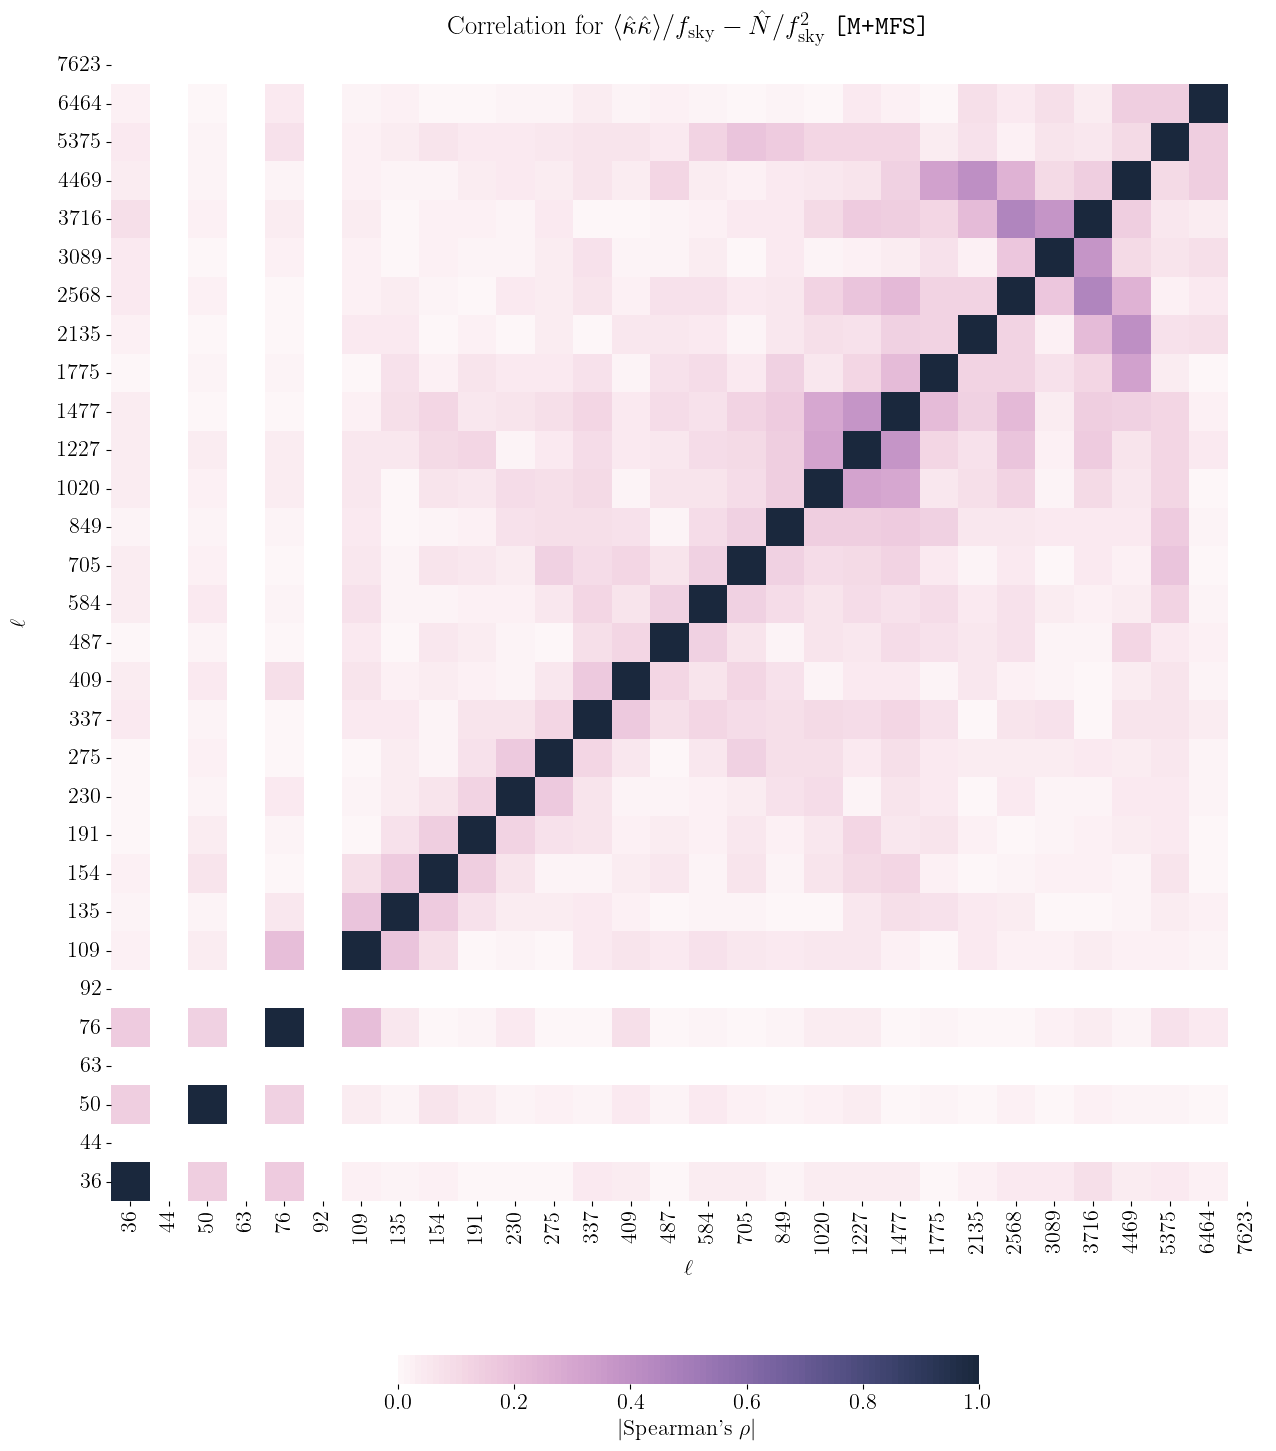

In [88]:
from scipy.stats import spearmanr
import seaborn as sns

data = np.transpose(Cls_tot['(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]'], axes=[1,2,0])[1]/N_runs
corr_nhat = np.array([[np.abs(spearmanr(data[i1], data[i2])[0])
                      for i1 in range(len(data))]
                     for i2 in range(len(data))])

ls = np.transpose(Cls_tot['(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]'], axes=[1,0,2])[0,0]
ll = ['%d'%l for l in ls]





plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 16

cmap =sns.cubehelix_palette(start=26/10, light=.97, n_colors=100)
plt.figure(figsize=(25,20))
ax = sns.heatmap(corr_nhat, cmap=cmap, cbar=True, vmin=0, vmax=1, square=True,
                cbar_kws={'label': r"$|$Spearman's $\rho|$", 
                          "orientation": "horizontal", 'pad':0.1, 'shrink':0.3})

ax.tick_params(axis=u'x', which=u'both',labelrotation=90)
ax.set_xticks(np.arange(len(ll))+0.5, labels=ll)
plt.xlabel(r'$\ell$'+'\n')



ax.tick_params(axis=u'y', which=u'both',labelrotation=0)
ax.set_yticks(np.arange(len(ll))+0.5, labels=ll)
plt.ylabel(r'$\ell$'+'\n')

plt.title(r'Correlation for %s'%(labels['(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]']))
plt.xlim(19, 49)
plt.ylim(19, 49)

In [117]:
cmap =sns.cubehelix_palette(start=20/10, light=.97, n_colors=10)
cmap

[[0.9775842932368578, 0.9662986279679047, 0.9923414466011184],
 [0.8807370474550492, 0.8616474600565431, 0.962166479494795],
 [0.7649138495209727, 0.7756915902235908, 0.9191196332290303],
 [0.6360963621833733, 0.7002982357296733, 0.8548580177909689],
 [0.5046302246435296, 0.6307348058403199, 0.7665502331166834],
 [0.37521842639602443, 0.558630769150767, 0.6506158924996533],
 [0.2667998499778768, 0.48472672978269, 0.522732567615731],
 [0.17853884079203805, 0.40193838440092694, 0.38752639901174296],
 [0.10898794713212881, 0.3033567065577047, 0.250351941614613],
 [0.060710932072609, 0.19669331686871622, 0.13415606975390282]]

0.395087617168172


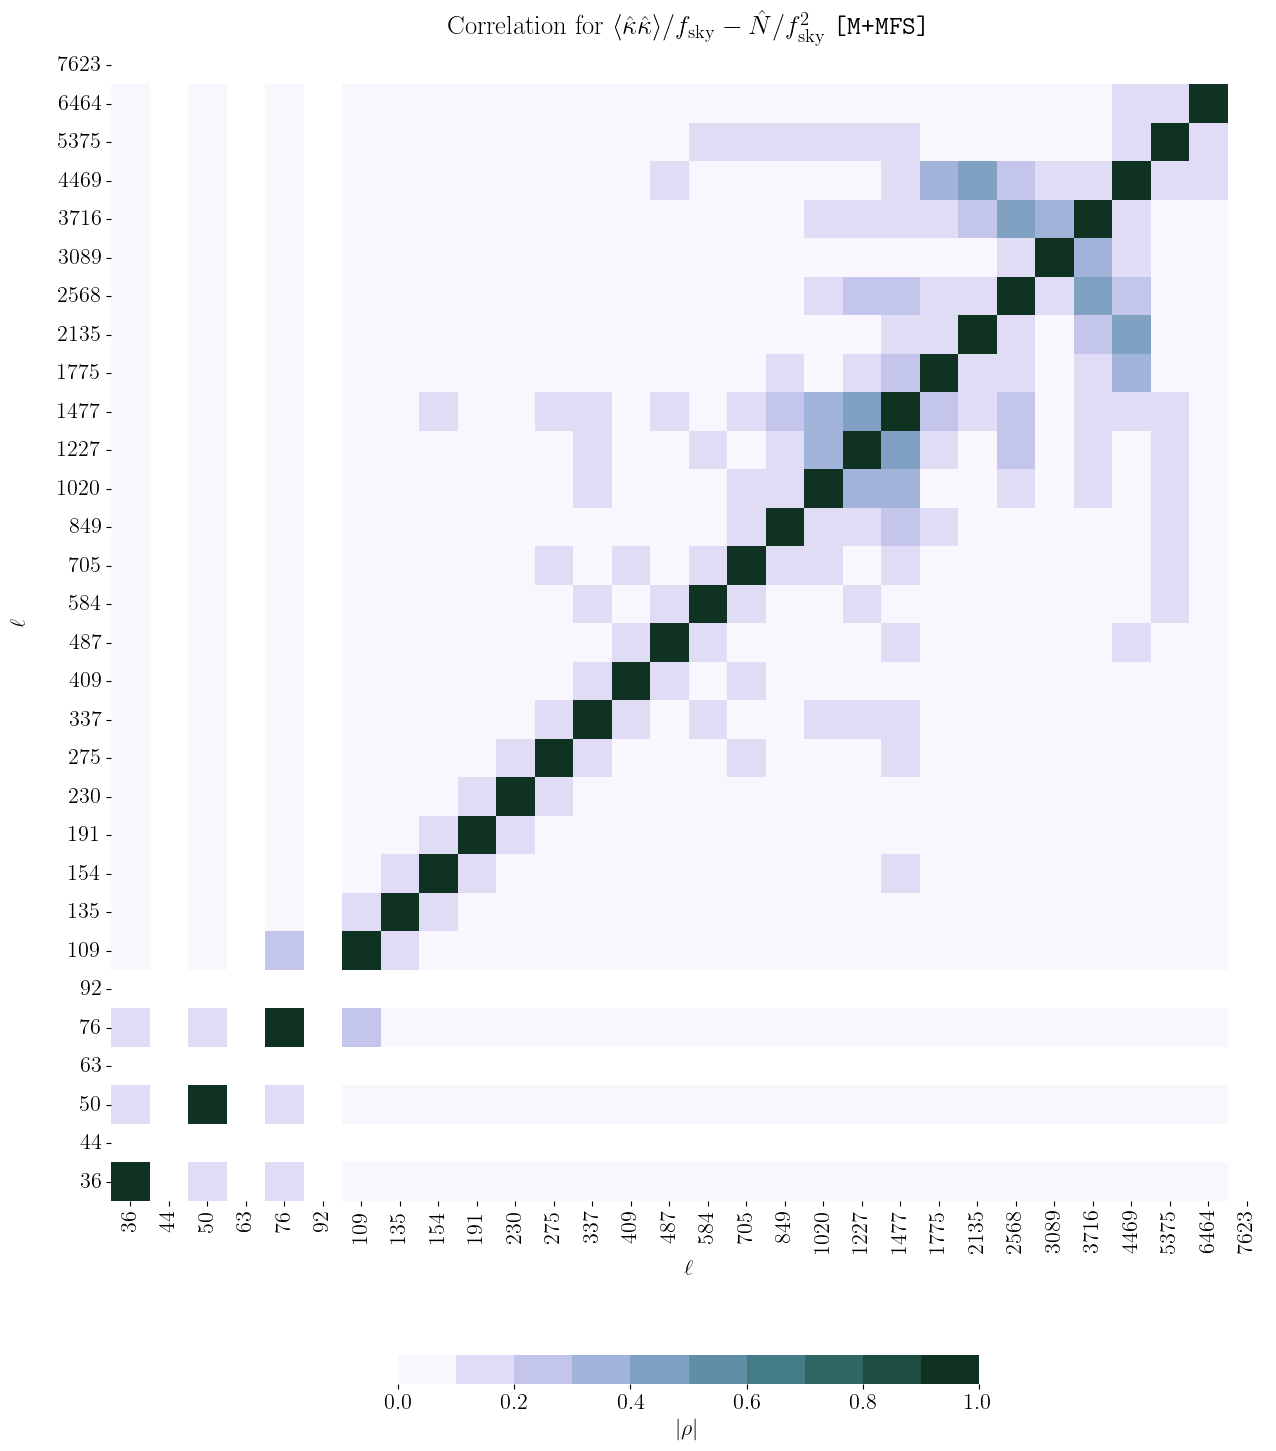

In [118]:
from scipy.stats import spearmanr
import seaborn as sns

data = np.transpose(Cls_tot['(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]'], axes=[1,2,0])[1]/N_runs
corr_nhat = np.array([[np.abs(np.corrcoef(data[i1], data[i2])[1,0])
                      for i1 in range(len(data))]
                     for i2 in range(len(data))])

print(np.corrcoef(data[43],data[44])[1,0])

ls = np.transpose(Cls_tot['(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]'], axes=[1,0,2])[0,0]
ll = ['%d'%l for l in ls]





plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 16

plt.figure(figsize=(25,20))
ax = sns.heatmap(corr_nhat, cmap=cmap, cbar=True, vmin=0, vmax=1, square=True,
                cbar_kws={'label': r"$|\rho|$", 
                          "orientation": "horizontal", 'pad':0.1, 'shrink':0.3})

ax.tick_params(axis=u'x', which=u'both',labelrotation=90)
ax.set_xticks(np.arange(len(ll))+0.5, labels=ll)
plt.xlabel(r'$\ell$'+'\n')



ax.tick_params(axis=u'y', which=u'both',labelrotation=0)
ax.set_yticks(np.arange(len(ll))+0.5, labels=ll)
plt.ylabel(r'$\ell$'+'\n')

plt.title(r'Correlation for %s'%(labels['(Auto QE)-(Power Spectrum(hat NL)) [M+MFS]']))
plt.xlim(19, 49)
plt.ylim(19, 49)

plt.savefig('figures/corr_nhat_masked.pdf', bbox_inches='tight')

In [151]:
cmap =sns.cubehelix_palette(start=3/10, light=.97, n_colors=10, hue=1)
cmap

[[0.9761685961146624, 0.9756069943821757, 0.946275465343009],
 [0.9146326055519555, 0.8787548530191849, 0.7779654736781705],
 [0.8744263957174612, 0.7708626615590776, 0.6463491494855154],
 [0.8386939626492207, 0.6546482788160747, 0.5471690551428092],
 [0.7947499299150396, 0.5370219608554798, 0.47795743390106216],
 [0.7293474260920751, 0.4197838611537773, 0.42953600355051025],
 [0.6417535212778529, 0.3180316352233389, 0.39422640439484247],
 [0.5286077582754989, 0.22976947923426405, 0.35624759847992044],
 [0.38755935113612067, 0.15258485683518552, 0.2993001074758182],
 [0.2392434679065982, 0.09059764265151823, 0.21630997620626663]]

0.3697455667139145


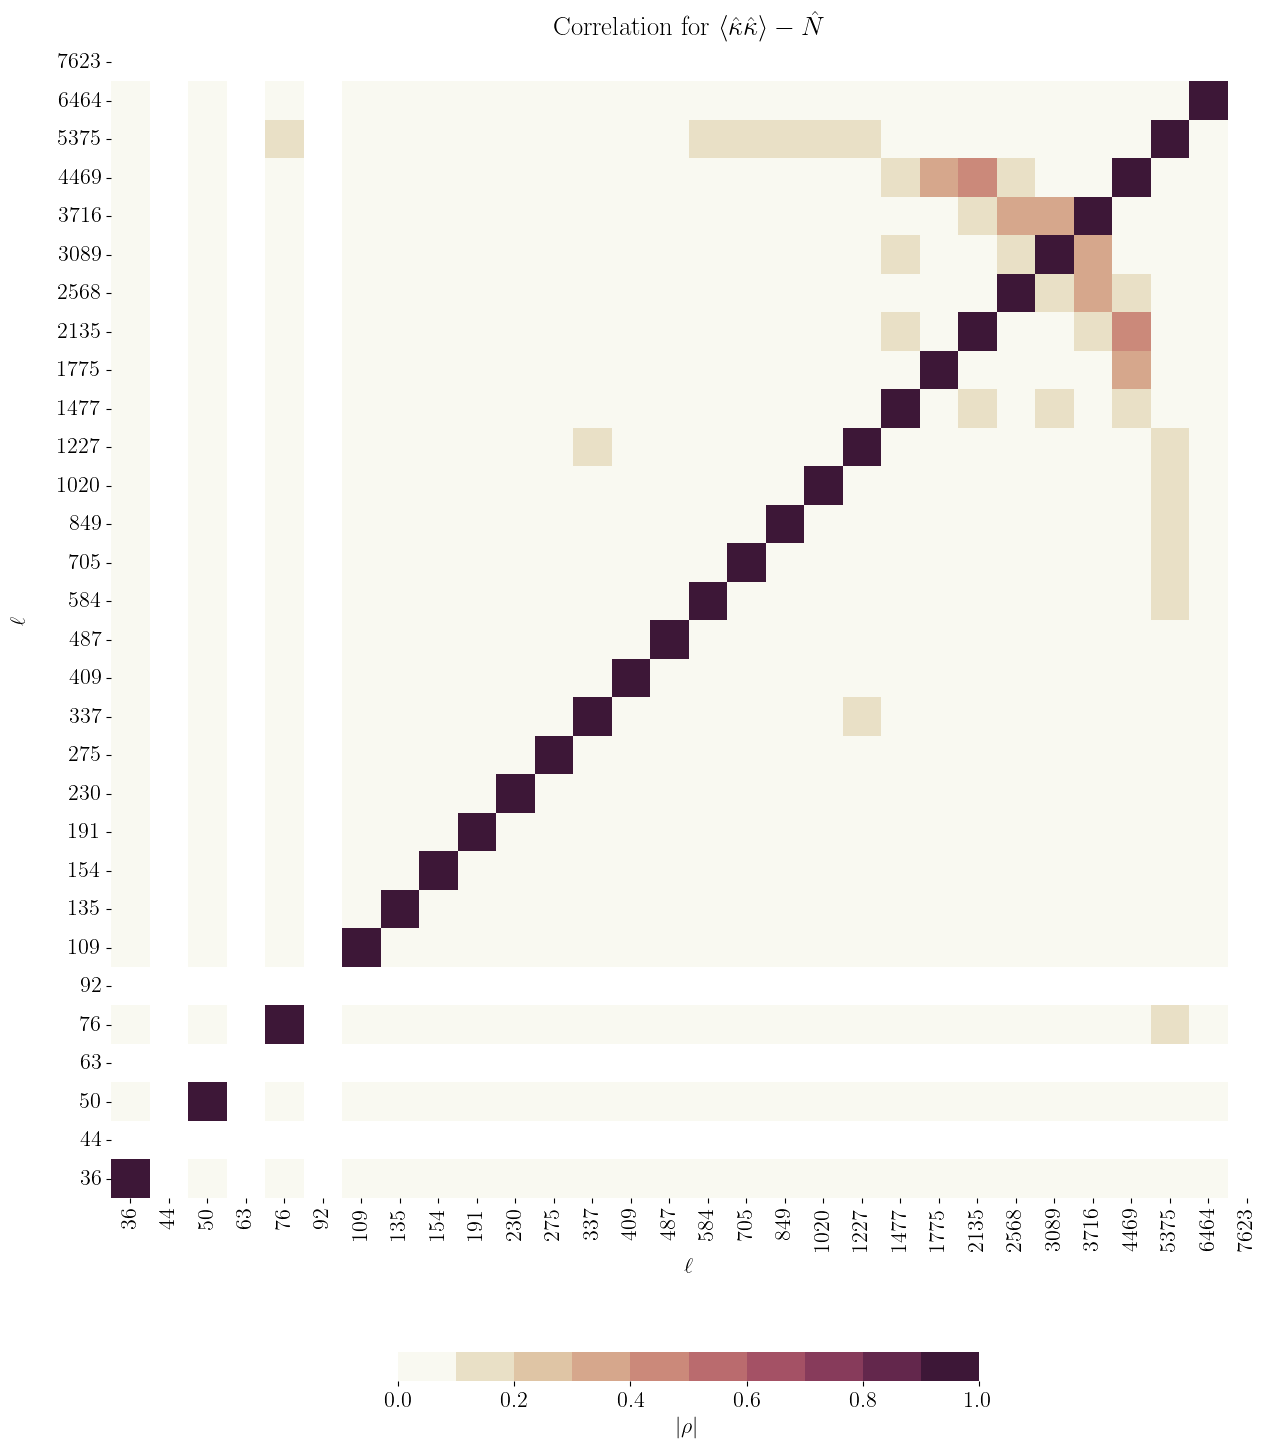

In [152]:
from scipy.stats import spearmanr
import seaborn as sns

key = '(Auto QE)-(Power Spectrum(hat NL))'
data = np.transpose(Cls_tot[key], axes=[1,2,0])[1]/N_runs
corr_nhat = np.array([[np.abs(np.corrcoef(data[i1], data[i2])[1,0])
                      for i1 in range(len(data))]
                     for i2 in range(len(data))])

print(np.corrcoef(data[43],data[44])[1,0])

ls = np.transpose(Cls_tot[key], axes=[1,0,2])[0,0]
ll = ['%d'%l for l in ls]





plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 16

plt.figure(figsize=(25,20))
ax = sns.heatmap(corr_nhat, cmap=cmap, cbar=True, vmin=0, vmax=1, square=True,
                cbar_kws={'label': r"$|\rho|$", 
                          "orientation": "horizontal", 'pad':0.1, 'shrink':0.3})

ax.tick_params(axis=u'x', which=u'both',labelrotation=90)
ax.set_xticks(np.arange(len(ll))+0.5, labels=ll)
plt.xlabel(r'$\ell$'+'\n')



ax.tick_params(axis=u'y', which=u'both',labelrotation=0)
ax.set_yticks(np.arange(len(ll))+0.5, labels=ll)
plt.ylabel(r'$\ell$'+'\n')

plt.title(r'Correlation for %s'%(labels[key]))
plt.xlim(19, 49)
plt.ylim(19, 49)

plt.savefig('figures/corr_nhat.pdf',bbox_inches='tight')